# 1. Install Dependencies and Setup/Bağımlılıkları Kurma ve Kurulum

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "C:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = parse_requirement(requirement_string)
        File "C:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "C:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "C:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\_vendor\packa

In [3]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
adtk                         0.6.2
aiofiles                     23.1.0
aiohttp                      3.8.4
aiosignal                    1.3.1
alpha-vantage                2.3.1
altair                       4.2.2
anyio                        3.6.2
appdirs                      1.4.4
astor                        0.8.1
asttokens                    2.2.1
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        23.1.0
backcall                     0.2.0
backoff                      2.2.1
Backtesting                  0.3.3
backtrader                   1.9.74.123
beautifulsoup4               4.12.0
blinker                      1.6.2
blis                         0.7.9
bokeh                        3.1.0
bs4                          0.0.1
cachetools                   5.3.0
catalogue                    1.0.2
catboost                     1.1.1
cert

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')

# Türkçe Açıklama:
# Sistemdeki tüm GPU'ları listele
for gpu in gpus: 
    # Türkçe Açıklama:
    # Bellek büyümesini etkinleştir
    tf.config.experimental.set_memory_growth(gpu, True)

    # English Explanation:
    # Enable memory growth
    # for each GPU

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images/Tehlikeli resimleri kaldır

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):

    # Türkçe Açıklama:
    # Verilen dizindeki her sınıf için döngü oluştur
    for image in os.listdir(os.path.join(data_dir, image_class)):

        image_path = os.path.join(data_dir, image_class, image)
        
        try:
            img = cv2.imread(image_path)
            
            # Türkçe Açıklama:
            # Dosyanın uzantısını belirle
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print('Uzantı listesinde olmayan bir görüntü: {}'.format(image_path))
                os.remove(image_path)
        
        except Exception as e:
            print('Görüntü ile ilgili bir sorun oluştu: {}'.format(image_path))
            # os.remove(image_path)


# 3. Load Data/Veri yükle

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

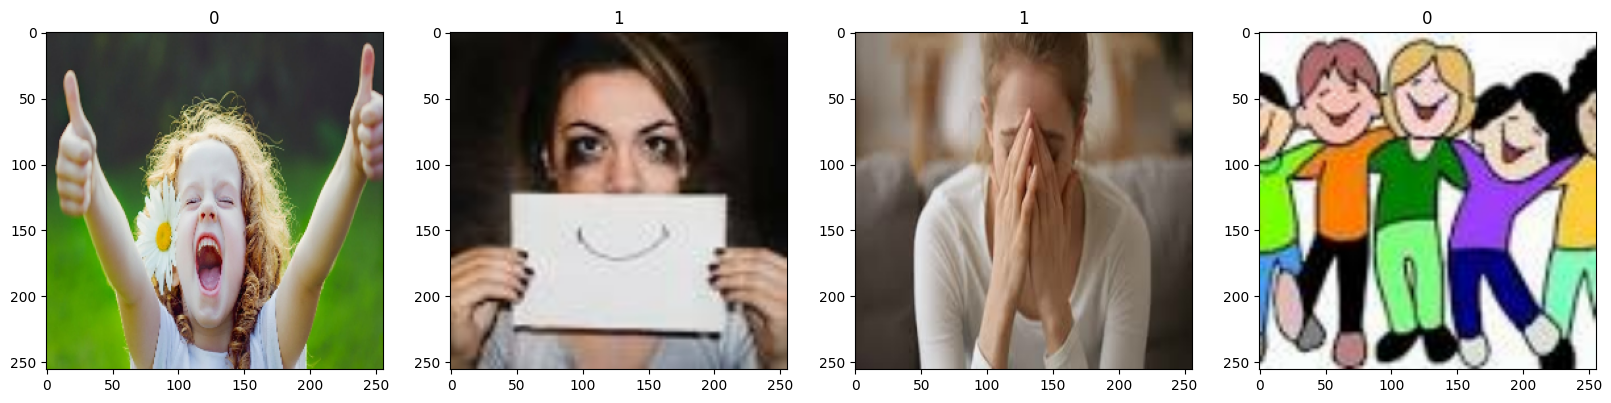

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Türkçe Açıklama:
# Batch içindeki ilk 4 görüntü için döngü oluştur
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))

    # Türkçe Açıklama:
    # Eksen başlığını belirle
    ax[idx].title.set_text(batch[1][idx])

    # English Explanation:
    # Set the title for each axis

# English Explanation:
# Create subplots with 4 columns and a figure size of (20, 20)


# 4. Scale Data/Ölçek Verileri

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         [[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         [[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         ...,
 
         [[0.5890106 , 0.28802463, 0.2644201 ],
          [0.50568

# 5. Split Data/Verileri Böl

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)

# Türkçe Açıklama:
# Eğitim veri kümesi için ilk train_size öğeyi al
val = data.skip(train_size).take(val_size)

# Türkçe Açıklama:
# Doğrulama veri kümesi için train_size öğesini atla ve val_size öğesini al
test = data.skip(train_size+val_size).take(test_size)

# Türkçe Açıklama:
# Test veri kümesi için train_size+val_size öğesini atla ve test_size öğesini al

# English Explanation:
# Take the first train_size elements for the training dataset
# Skip train_size elements and take val_size elements for the validation dataset
# Skip train_size+val_size elements and take test_size elements for the test dataset

# 6. Build Deep Learning Model/Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))

# Turkish Explanation:
# 3x3 boyutunda 16 filtre ile Convolutional layer ekle
# Aktivasyon fonksiyonu olarak 'relu' kullan
# Giriş şekli (256, 256, 3) olarak belirtilmiştir

model.add(MaxPooling2D())

# Turkish Explanation:
# MaxPooling layer ekle

model.add(Conv2D(32, (3, 3), 1, activation='relu'))

# Turkish Explanation:
# 3x3 boyutunda 32 filtre ile Convolutional layer ekle
# Aktivasyon fonksiyonu olarak 'relu' kullan

model.add(MaxPooling2D())

# Turkish Explanation:
# MaxPooling layer ekle

model.add(Conv2D(16, (3, 3), 1, activation='relu'))

# Turkish Explanation:
# 3x3 boyutunda 16 filtre ile Convolutional layer ekle
# Aktivasyon fonksiyonu olarak 'relu' kullan

model.add(MaxPooling2D())

# Turkish Explanation:
# MaxPooling layer ekle

model.add(Flatten())

# Turkish Explanation:
# Flatten layer ekle

model.add(Dense(256, activation='relu'))

# Turkish Explanation:
# 256 birimli fully connected layer (Dense layer) ekle
# Aktivasyon fonksiyonu olarak 'relu' kullan

model.add(Dense(1, activation='sigmoid'))

# Turkish Explanation:
# 1 birimli fully connected layer (Dense layer) ekle
# Aktivasyon fonksiyonu olarak 'sigmoid' kullan


In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 617ms/step - loss: 0.7777 - accuracy: 0.5312 - val_loss: 0.6099 - val_accuracy: 0.8281
Epoch 2/20
7/7 [==============================] - 5s 564ms/step - loss: 0.6196 - accuracy: 0.6652 - val_loss: 0.5574 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 5s 568ms/step - loss: 0.5438 - accuracy: 0.7455 - val_loss: 0.5655 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 5s 570ms/step - loss: 0.4830 - accuracy: 0.7768 - val_loss: 0.4269 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 5s 577ms/step - loss: 0.4594 - accuracy: 0.7946 - val_loss: 0.3736 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 5s 566ms/step - loss: 0.3717 - accuracy: 0.8616 - val_loss: 0.3219 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 5s 558ms/step - loss: 0.3128 - accuracy: 0.8482 - val_loss: 0.3187 - val_accuracy: 0.8594
Epoch 8/20
7/7 [====

# 8. Plot Performance/Grafik ile Performans bakma

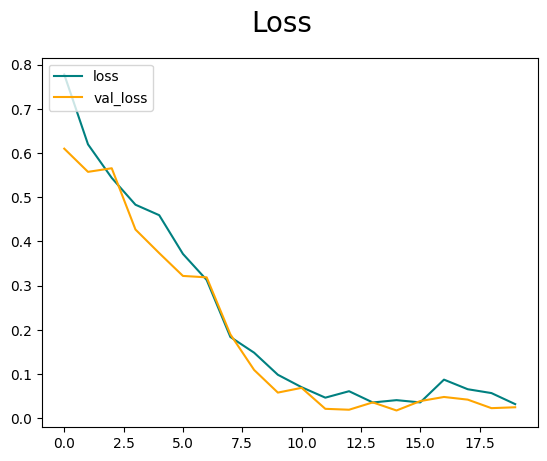

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

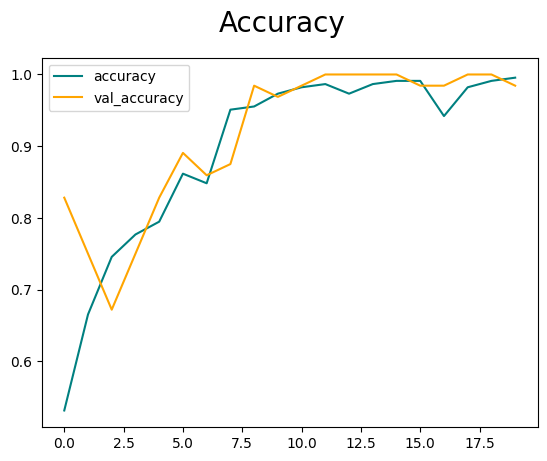

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate/Değerlendirmek 

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    X, y = batch

    yhat = model.predict(X)

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

# Turkish Explanation:
# Test veri kümesi için döngü oluştur ve her bir partiyi al
# Girdi verilerini (X) ve hedef değerleri (y) ayır
# Model üzerinde tahmin yap (yhat)
# Hassasiyet (precision), geri çağırma (recall) ve doğruluk (accuracy) değerlerini güncelle

# English Explanation:
# Iterate over the test dataset and take each batch
# Separate input data (X) and target values (y)
# Make predictions (yhat) using the model
# Update precision, recall, and accuracy values


1/1 [==============================] - 0s 131ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [36]:
import cv2

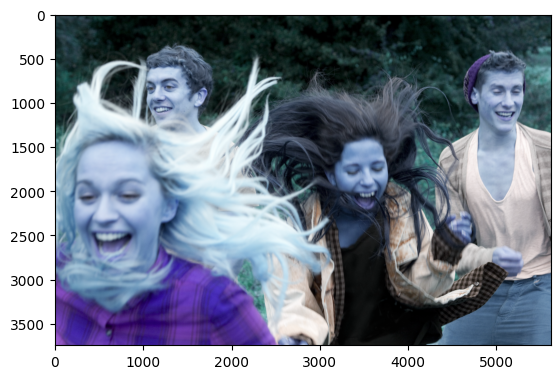

In [37]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

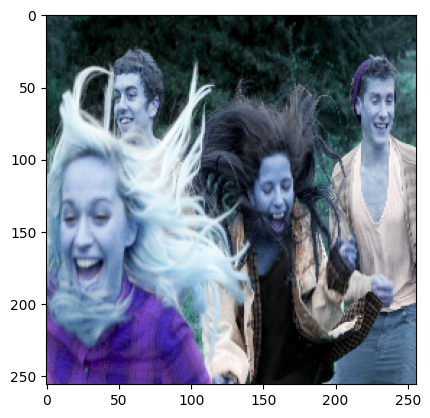

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [40]:
yhat

array([[0.09898116]], dtype=float32)

In [41]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model/Modeli Kaydet

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save(os.path.join('models','imageclassifier.h5'))

In [44]:
from keras.models import load_model
import os

file_path = os.path.join('models', 'imageclassifier.h5')
new_model = load_model(file_path)

In [45]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 56ms/step


array([[0.09898116]], dtype=float32)